# Dynamically view HOG Features on CPU using fpl

In [1]:
from fastplotlib.layouts import GridPlot
from ipywidgets import IntSlider, VBox
from skimage.feature import hog
from skimage import data, exposure
from decord import VideoReader
import cv2
import numpy as np

In [2]:
video_path = "/home/clewis7/repos/hog-classifier-prototype/eaf3_2022-12-18_s4_side_v028.avi"

In [3]:
vr = VideoReader(video_path)

In [4]:
to_gray = lambda f: cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

In [5]:
gp = GridPlot(shape=(1,2), names=[["raw", "hog"]])


gp[0,0].camera.scale.y = -1
gp[0,1].camera.scale.y = -1

frame0 = to_gray(vr[0].asnumpy())


fd, hog0 = hog(
    frame0, 
    orientations=8, 
    pixels_per_cell=(8,8), 
    cells_per_block=(1,1), 
    visualize=True
)

gp["raw"].add_image(frame0, cmap="gray")
gp["hog"].add_image(hog0, cmap="gray")

slider = IntSlider(min=0, max=len(vr)-1, step=1, value=0)

def update_movie(change):
    index = change["new"]
    new = to_gray(vr[index].asnumpy())
    gp["raw"].graphics[0].data = new
    fd, new_hog = hog(
        new, 
        orientations=8, 
        pixels_per_cell=(8,8), 
        cells_per_block=(1,1), 
        visualize=True
    )

    gp["hog"].graphics[0].data = new_hog
    
slider.observe(update_movie, "value")
    
# Use an ipywidgets VBox to show the plot and slider
VBox([gp.show(), slider])

RFBOutputContext()

In [6]:
labels = np.zeros(10623, dtype=int)

In [7]:
labels.shape

(10623,)

In [8]:
labels[1636:1660]=1

In [9]:
labels[1713:1741]=1

In [10]:
labels[2895:2915]=1

In [11]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(max_iter=1_000)

In [13]:
from tqdm import tqdm

In [20]:
hogs = list()
for frame in tqdm(range(1400,1800)):
    new = to_gray(vr[frame].asnumpy())
    fd, hog1 = hog(
        new, 
        orientations=8, 
        pixels_per_cell=(8,8), 
        cells_per_block=(1,1), 
        visualize=True
    )
    hogs.append(hog1.ravel())

100%|██████████████████████████████████████████| 400/400 [00:28<00:00, 13.96it/s]


In [25]:
clf.fit(np.vstack(hogs), labels[1400:1800])

LogisticRegression(max_iter=1000)

In [54]:
clf.predict_proba(np.array([hog1.ravel()]))[0][0]

0.999999791974584

In [52]:
clf.classes_

array([0, 1])

In [38]:
clf.predict(np.array([hog1.ravel()])).item()

0

RFBOutputContext()


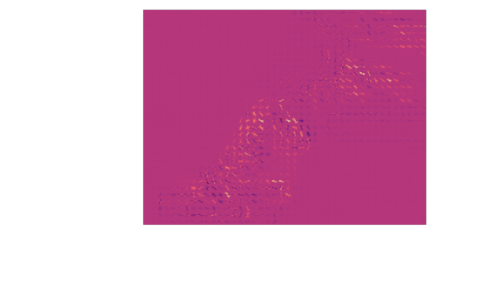

JupyterWgpuCanvas()

In [31]:
from fastplotlib import Plot

plot = Plot()

plot.camera.scale.y=-1

plot.add_image(clf.coef_.reshape(hog1.shape), cmap="magma")

plot.show()

## prediction with another video

In [39]:
video_path2 = "/data/kushal/cortex-learning/2p-trial-exps/eaf3/2022-12-18/behavior/s4/eaf3_2022-12-18_s4_side_v029.avi"

In [40]:
vr = VideoReader(video_path2)

In [41]:
to_gray = lambda f: cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

In [48]:
import math

In [57]:
gp = GridPlot(shape=(1,2), names=[["raw", "hog"]])


gp[0,0].camera.scale.y = -1
gp[0,1].camera.scale.y = -1

frame0 = to_gray(vr[0].asnumpy())


fd, hog0 = hog(
    frame0, 
    orientations=8, 
    pixels_per_cell=(8,8), 
    cells_per_block=(1,1), 
    visualize=True
)

gp["raw"].add_image(frame0, cmap="gray")
gp["hog"].add_image(hog0, cmap="gray")

slider = IntSlider(min=0, max=len(vr)-1, step=1, value=0)

def update_movie(change):
    index = change["new"]
    new = to_gray(vr[index].asnumpy())
    gp["raw"].graphics[0].data = new
    fd, new_hog = hog(
        new, 
        orientations=8, 
        pixels_per_cell=(8,8), 
        cells_per_block=(1,1), 
        visualize=True
    )

    gp["hog"].graphics[0].data = new_hog
    
    classify = clf.predict(np.array([new_hog.ravel()])).item()
    prob = clf.predict_proba(np.array([new_hog.ravel()]))[0]
    if classify == 0:
        gp[0,1].set_title(f"no lift: {prob[0]:.3f}")
    else:
        gp[0,1].set_title(f"lift: {prob[1]:.2f}")
    
slider.observe(update_movie, "value")
    
# Use an ipywidgets VBox to show the plot and slider
VBox([gp.show(), slider])

RFBOutputContext()